In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


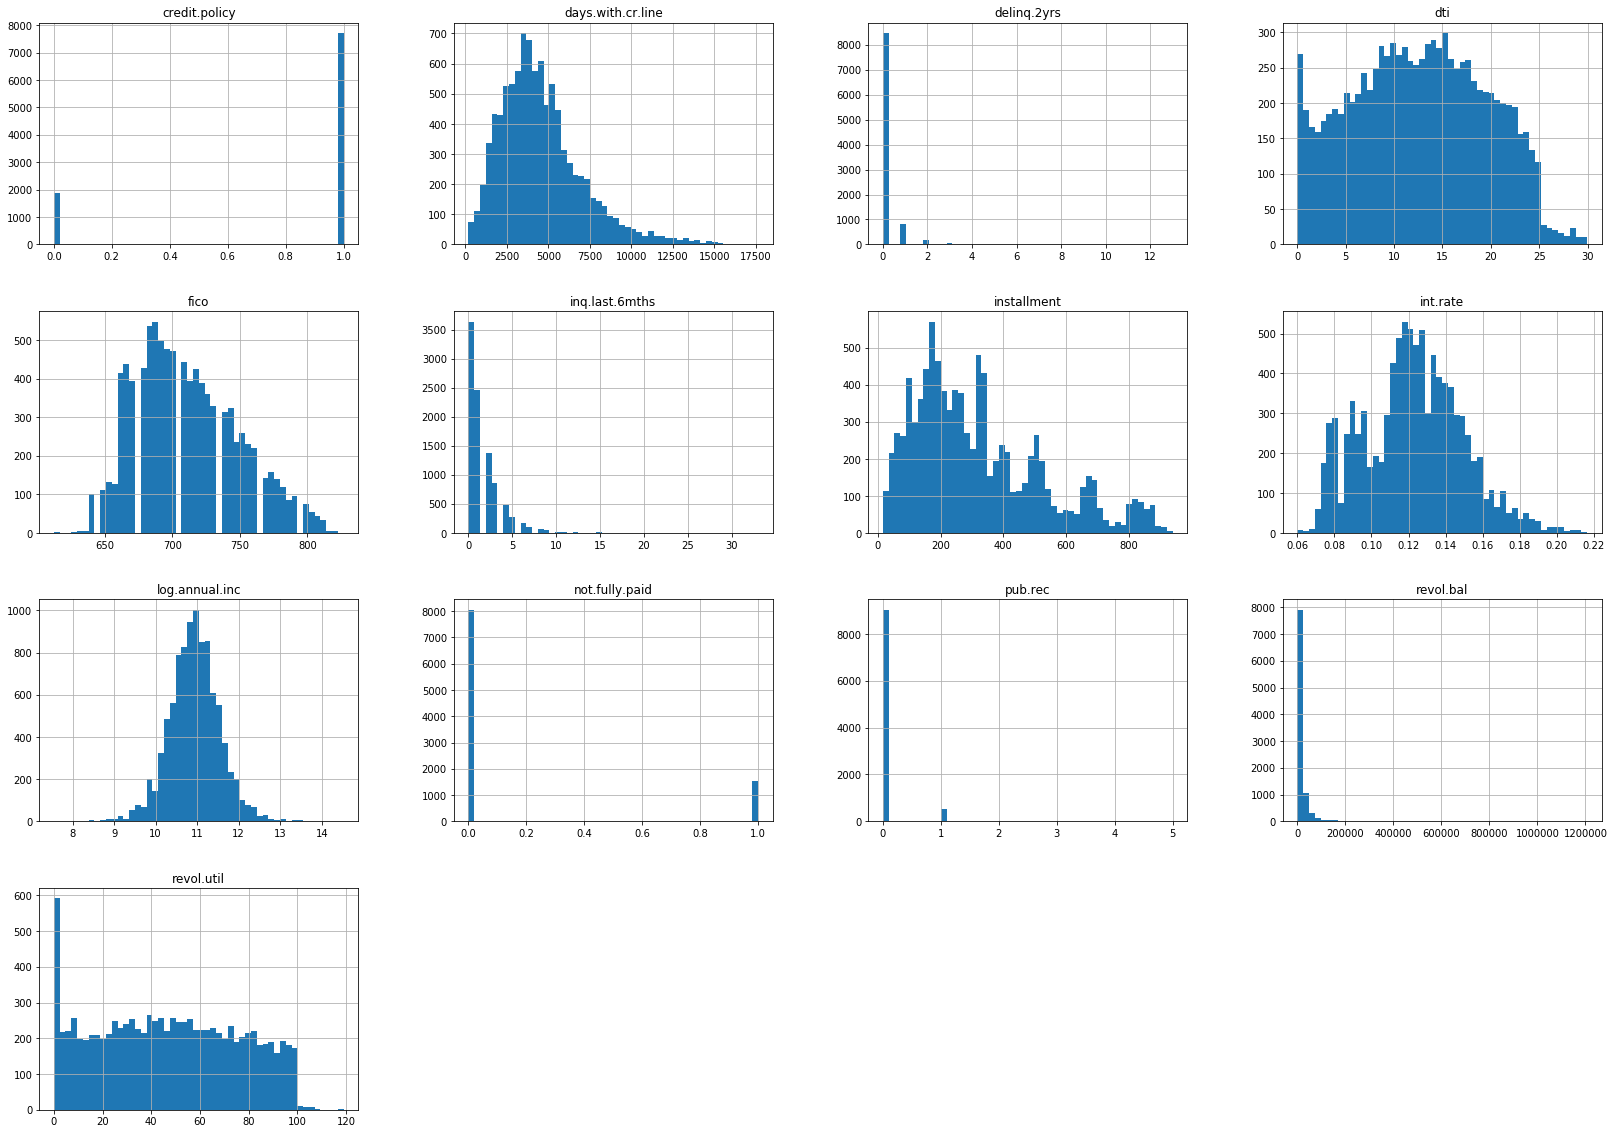

In [7]:
df.hist(bins=50, figsize=(28,20))
plt.show()

In [10]:
corr_matrix = df.corr()
corr_matrix["not.fully.paid"].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

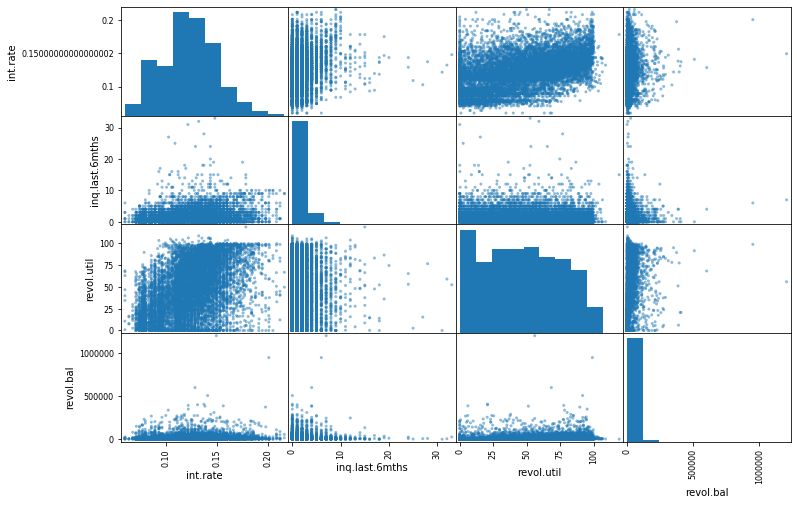

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["int.rate", "inq.last.6mths", "revol.util",
              "revol.bal"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [12]:
df_dum = pd.get_dummies(df,drop_first=True)
df_dum

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_dum.drop(['not.fully.paid'], axis = 1)
y = df_dum['not.fully.paid']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7183, 18)
(2395, 18)
(7183,)
(2395,)


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier()

In [21]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
predicted = rf.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
confusion_matrix(y_test,predicted)

array([[2005,    6],
       [ 375,    9]], dtype=int64)

In [27]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2011
           1       0.60      0.02      0.05       384

    accuracy                           0.84      2395
   macro avg       0.72      0.51      0.48      2395
weighted avg       0.80      0.84      0.77      2395



In [29]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [30]:
min_max_1 = MinMaxScaler()
min_max_2 = MinMaxScaler()

In [31]:
X_train = min_max_1.fit_transform(X_train)

In [32]:
X_train

array([[1.        , 0.41751918, 0.70706459, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1112532 , 0.2025593 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.64897698, 0.17360217, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.12787724, 0.15254146, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.50191816, 0.72085627, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.39769821, 0.19209926, ..., 0.        , 0.        ,
        0.        ]])

In [33]:
X_train = pd.DataFrame(X_train,columns = df_dum.drop(['not.fully.paid'],axis=1).columns)

In [34]:
X_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1.0,0.417519,0.707065,0.432444,0.592988,0.511628,0.176854,0.015454,0.628169,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.111253,0.202559,0.506903,0.426377,0.744186,0.400378,0.002427,0.030986,0.00000,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.648977,0.173602,0.481014,0.813356,0.186047,0.412350,0.008615,0.769014,0.09375,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.402174,0.026350,0.380956,0.255092,0.232558,0.048167,0.001980,0.935211,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.422634,0.230424,0.511149,0.788648,0.465116,0.415846,0.076969,0.917371,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,0.0,0.972506,0.187415,0.490974,0.012020,0.232558,0.199363,0.000481,0.113615,0.15625,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7179,1.0,0.295396,0.863554,0.528847,0.411352,0.674419,0.359148,0.020220,0.419718,0.00000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7180,1.0,0.127877,0.152541,0.486070,0.359933,0.674419,0.171869,0.003724,0.091080,0.09375,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7181,1.0,0.501918,0.720856,0.650362,0.306511,0.372093,0.326845,0.010742,0.699531,0.06250,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
X_test = min_max_2.fit_transform(X_test)

In [36]:
X_test = pd.DataFrame(X_test,columns = df_dum.drop(['not.fully.paid'],axis=1).columns)

In [38]:
rf2 = RandomForestClassifier()

In [39]:
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
predicted2 = rf2.predict(X_test)

In [45]:
confusion_matrix(y_test,predicted2)

array([[2000,   11],
       [ 369,   15]], dtype=int64)

In [46]:
print(classification_report(y_test,predicted2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2011
           1       0.58      0.04      0.07       384

    accuracy                           0.84      2395
   macro avg       0.71      0.52      0.49      2395
weighted avg       0.80      0.84      0.78      2395



In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 6 (2×3) combinations of hyperparameters
    {'n_estimators': [5, 10], 'max_features': [6, 8, 10]}]

rf3 = RandomForestClassifier() 
grid_search = GridSearchCV(rf3, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [50]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [52]:
predicted3 = grid_search.predict(X_test)

In [53]:
confusion_matrix(y_test,predicted3)

array([[1968,   43],
       [ 366,   18]], dtype=int64)

In [54]:
print(classification_report(y_test,predicted3))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2011
           1       0.30      0.05      0.08       384

    accuracy                           0.83      2395
   macro avg       0.57      0.51      0.49      2395
weighted avg       0.76      0.83      0.77      2395

